In [ ]:
! pip install pandas tqdm nltk matplotlib

In [112]:
import pandas as pd
import nltk
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from tqdm import tqdm

nltk.download('punkt')
tqdm.pandas()

train_stances = pd.read_csv('train_stances.csv', index_col="Body ID")
train_bodies = pd.read_csv('train_bodies.csv', index_col="Body ID")

test_stances = pd.read_csv('competition_test_stances.csv', index_col="Body ID")
test_bodies = pd.read_csv('competition_test_bodies.csv', index_col="Body ID")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/thomasvant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# XSum
train_bodies_xsum = pd.read_csv(f'train_bodies_google_pegasus-xsum.csv', index_col="Body ID")
test_bodies_xsum = pd.read_csv(f'test_bodies_google_pegasus-xsum.csv', index_col="Body ID")

# CNN/DailyNews
train_bodies_cnn_dailymail = pd.read_csv(f'train_bodies_google_pegasus-cnn_dailymail.csv', index_col="Body ID")
test_bodies_cnn_dailymail = pd.read_csv(f'test_bodies_google_pegasus-cnn_dailymail.csv', index_col="Body ID")

# Newsroom
# train_bodies_newsroom = pd.read_csv(f'train_bodies_google_pegasus-newsroom.csv', index_col="Body ID")
# test_bodies_newsroom = pd.read_csv(f'test_bodies_google_pegasus-newsroom.csv', index_col="Body ID")

# Multi-News
# train_bodies_multi_news = pd.read_csv(f'train_bodies_google_pegasus-multi_news.csv', index_col="Body ID")
# test_bodies_multi_news = pd.read_csv(f'test_bodies_google_pegasus-multi_news.csv', index_col="Body ID")

# Reduction calculation

In [1]:
def count(df):
    return df["articleBody"].progress_apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
count_df_train = pd.DataFrame()
count_df_train["Original"] = count(train_bodies)
count_df_train["XSum"] = count(train_bodies_xsum)
count_df_train["CNN/DailyMail"] = count(train_bodies_cnn_dailymail)
count_df_train["NEWSROOM"] = count(train_bodies_newsroom)
count_df_train["Multi-News"] = count(train_bodies_multi_news)

In [116]:
reduction_df_train = pd.DataFrame()
reduction_df_train["XSum"] = count_df_train["XSum"] / count_df_train["Original"]
reduction_df_train["CNN/DailyMail"] = count_df_train["CNN/DailyMail"] / count_df_train["Original"]
reduction_df_train["NEWSROOM"] = count_df_train["NEWSROOM"] / count_df_train["Original"]
reduction_df_train["Multi-News"] = count_df_train["Multi-News"] / count_df_train["Original"]

# REST IS TODO

In [120]:
new_train_bodies_summary = test_bodies_summary_cnn_dailymail

In [121]:
new_train_bodies_summary[reduction > 1.0] = test_bodies[reduction > 1.0]

In [123]:
new_train_bodies_summary[new_train_bodies_summary["articleBody"] == test_bodies["articleBody"]]

,articleBody
Body ID,
1,Al-Sisi has denied Israeli reports stating tha...
52,Diane Foley told ABC News that US officials th...
143,"Hong Kong protesters have ""emulated"" the Fergu..."
180,British jihadist al-Britani has reportedly bee...
192,The US declared the video of Sotloff to be aut...
...,...
2460,Egyptian President al-Sisi denied reports that...
2466,The third breast story is a hoax.
2505,The Foley family claims the US threatened them...


In [60]:
new_count_summary = new_train_bodies_summary["articleBody"].progress_apply(lambda x: len(nltk.word_tokenize(x)))

100%|█████████████████████████████████████| 1683/1683 [00:00<00:00, 5739.62it/s]


<AxesSubplot:>

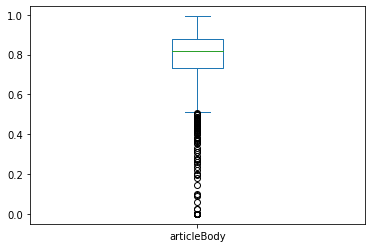

In [63]:
abs((new_count_summary - count) / count).plot.box()

In [124]:
new_train_bodies_summary.to_csv("test_bodies_google_pegasus-cnn_dailymail_cleaned.csv")